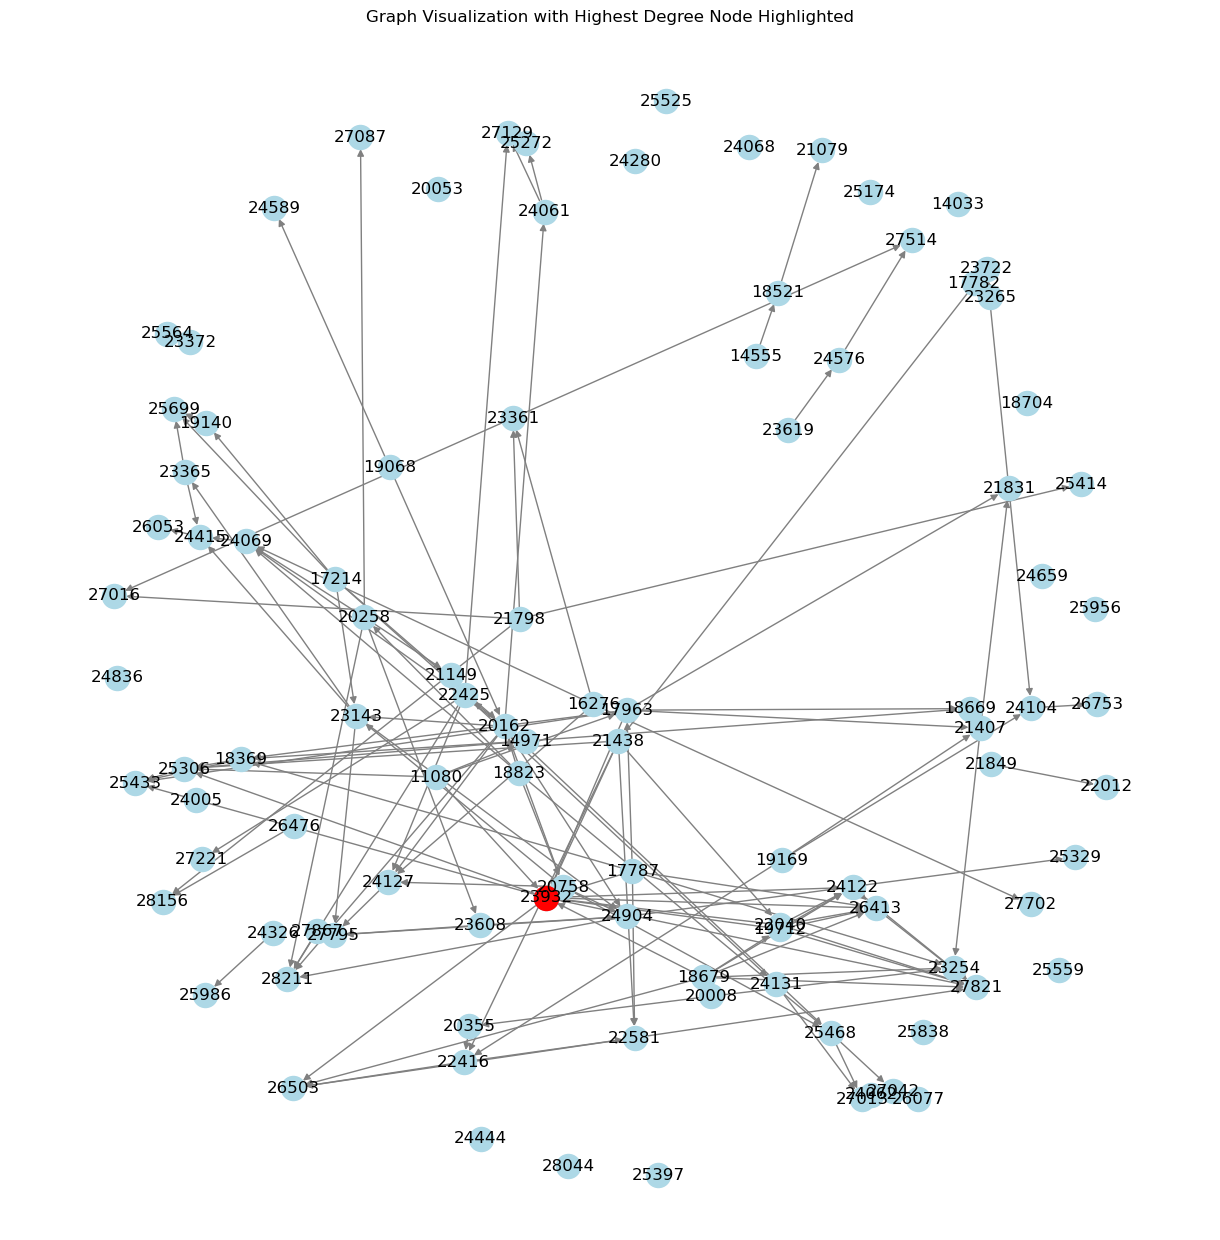

Components and their sizes: [43, 1, 29, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


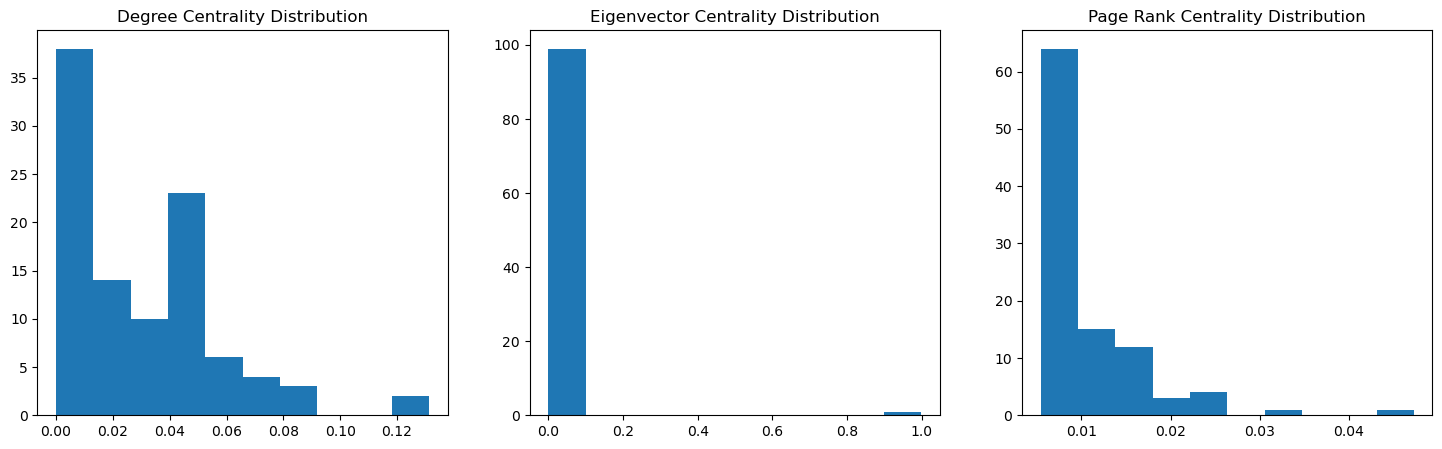

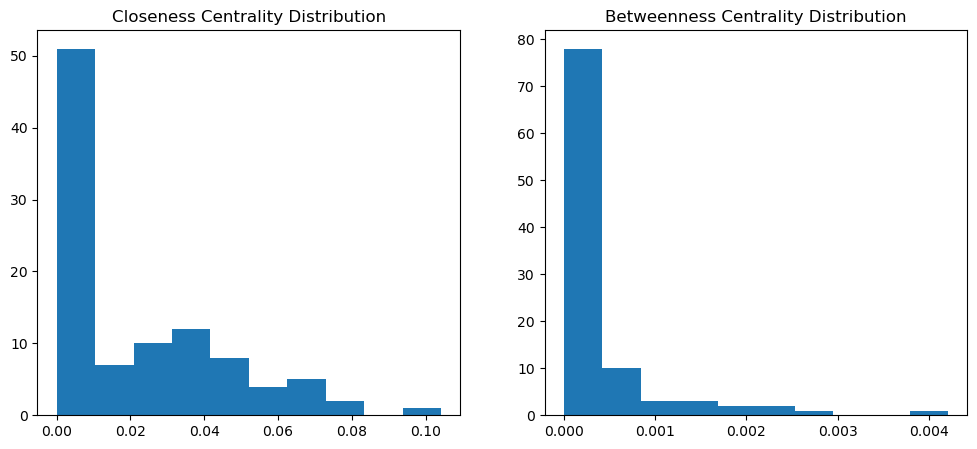

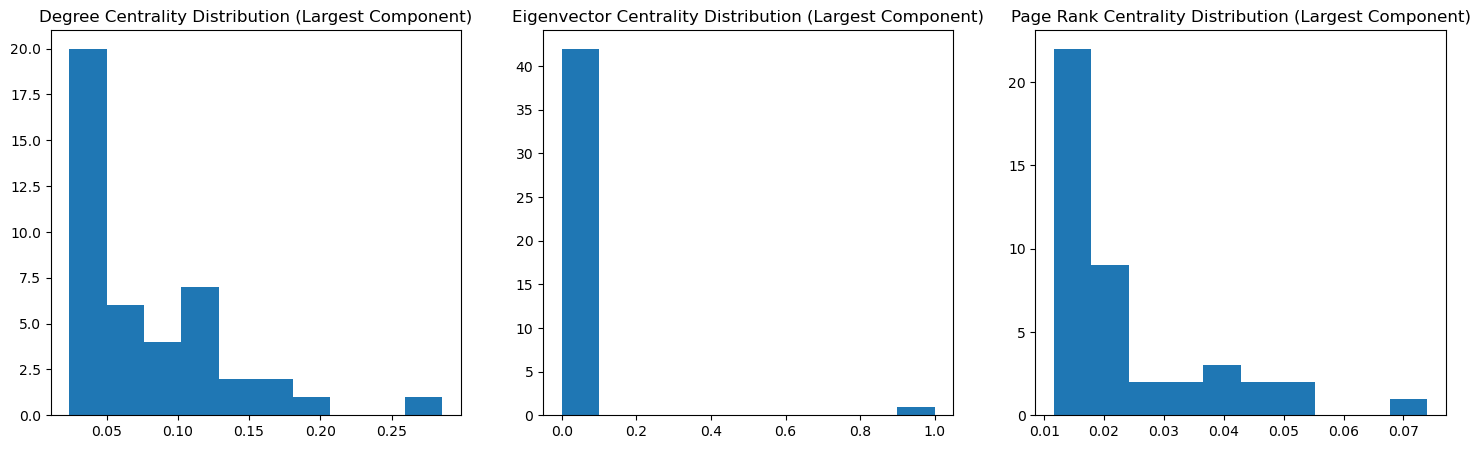

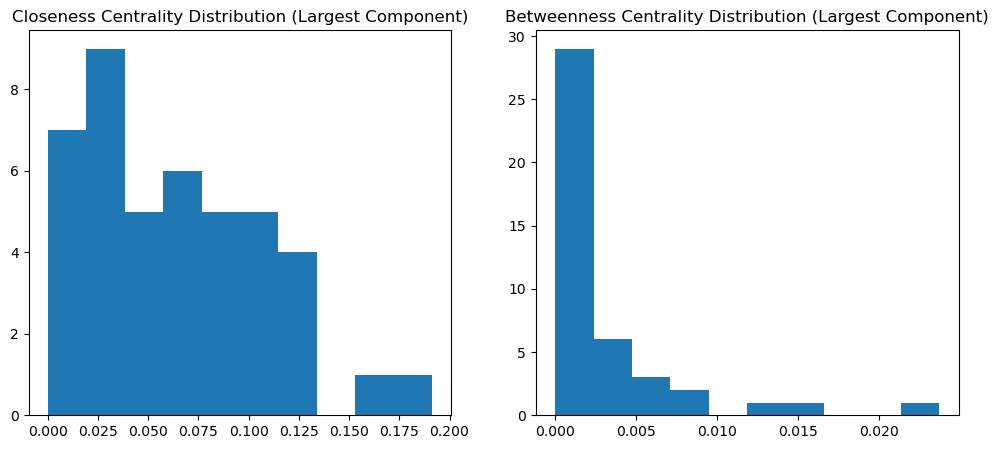

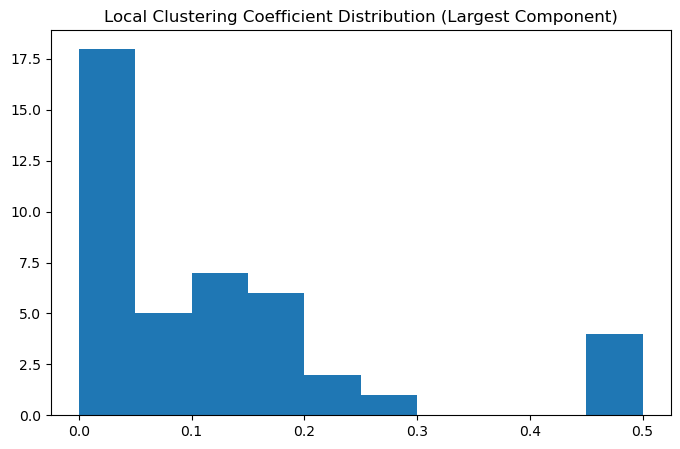

Global Clustering Coefficient (Largest Component): 0.11521947045202861
The largest component is not bipartite.


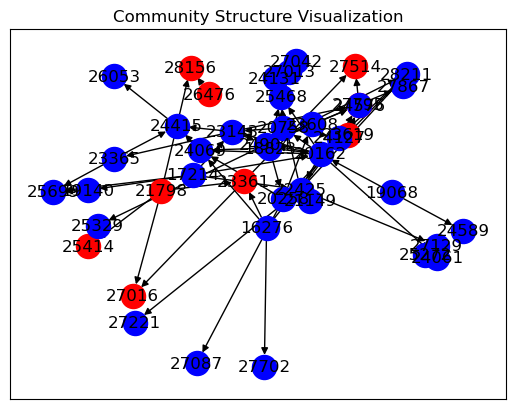

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms import bipartite

#A
# Load the dataset from a local CSV file
edges = pd.read_csv('edges.csv')

# Create a directed graph
G = nx.from_pandas_edgelist(edges, source='id_1', target='id_2', create_using=nx.DiGraph())

# Calculate in-degree centrality for all nodes
in_degree_centrality = nx.in_degree_centrality(G)

# Get the top 100 nodes with the highest in-degree centrality
top_100_nodes = sorted(in_degree_centrality, key=in_degree_centrality.get, reverse=True)[:100]

# Create a subgraph with the top 100 nodes
subgraph = G.subgraph(top_100_nodes)

# Display the whole graph using Gephi visualization and highlight the node with the highest degree
highest_degree_node = max(subgraph.degree, key=lambda x: x[1])[0]
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(12, 12))
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
nx.draw_networkx_nodes(subgraph, pos, nodelist=[highest_degree_node], node_color='red')
plt.title("Graph Visualization with Highest Degree Node Highlighted")
plt.show()

# Enumerate the various components of the network and indicate the size of each component
components = list(nx.weakly_connected_components(subgraph))
component_sizes = [len(c) for c in components]
print("Components and their sizes:", component_sizes)

# Display the distribution (histogram) of degree centrality, eigenvector centrality, and page rank centrality
degree_centrality = nx.degree_centrality(subgraph)
eigenvector_centrality = nx.eigenvector_centrality(subgraph, max_iter=1000, tol=1e-06)
page_rank = nx.pagerank(subgraph)

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(degree_centrality.values(), bins=10)
plt.title("Degree Centrality Distribution")

plt.subplot(1, 3, 2)
plt.hist(eigenvector_centrality.values(), bins=10)
plt.title("Eigenvector Centrality Distribution")

plt.subplot(1, 3, 3)
plt.hist(page_rank.values(), bins=10)
plt.title("Page Rank Centrality Distribution")

plt.show()

# Repeat (c) using closeness centrality and betweenness centrality
closeness_centrality = nx.closeness_centrality(subgraph)
betweenness_centrality = nx.betweenness_centrality(subgraph)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(closeness_centrality.values(), bins=10)
plt.title("Closeness Centrality Distribution")

plt.subplot(1, 2, 2)
plt.hist(betweenness_centrality.values(), bins=10)
plt.title("Betweenness Centrality Distribution")

plt.show()

# Repeat (c) and (d) for the largest component of the network
largest_component = max(components, key=len)
largest_subgraph = subgraph.subgraph(largest_component)

degree_centrality_largest = nx.degree_centrality(largest_subgraph)
eigenvector_centrality_largest = nx.eigenvector_centrality(largest_subgraph, max_iter=1000, tol=1e-06)
page_rank_largest = nx.pagerank(largest_subgraph)
closeness_centrality_largest = nx.closeness_centrality(largest_subgraph)
betweenness_centrality_largest = nx.betweenness_centrality(largest_subgraph)

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(degree_centrality_largest.values(), bins=10)
plt.title("Degree Centrality Distribution (Largest Component)")

plt.subplot(1, 3, 2)
plt.hist(eigenvector_centrality_largest.values(), bins=10)
plt.title("Eigenvector Centrality Distribution (Largest Component)")

plt.subplot(1, 3, 3)
plt.hist(page_rank_largest.values(), bins=10)
plt.title("Page Rank Centrality Distribution (Largest Component)")

plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(closeness_centrality_largest.values(), bins=10)
plt.title("Closeness Centrality Distribution (Largest Component)")

plt.subplot(1, 2, 2)
plt.hist(betweenness_centrality_largest.values(), bins=10)
plt.title("Betweenness Centrality Distribution (Largest Component)")

plt.show()

# Display the local clustering coefficient of each node and draw the corresponding distribution function for the largest component
local_clustering_coefficients = nx.clustering(largest_subgraph)

plt.figure(figsize=(8, 5))
plt.hist(local_clustering_coefficients.values(), bins=10)
plt.title("Local Clustering Coefficient Distribution (Largest Component)")
plt.show()

# Calculate the global clustering coefficient of the overall graph (or its largest connected component)
global_clustering_coefficient = nx.average_clustering(largest_subgraph)
print("Global Clustering Coefficient (Largest Component):", global_clustering_coefficient)

# Check if the graph is bipartite
if bipartite.is_bipartite(largest_subgraph):
    bipartite_subgraph_nodes = bipartite.sets(largest_subgraph)[0]
    bipartite_subgraph = largest_subgraph.subgraph(bipartite_subgraph_nodes)
    print("Bipartite Subgraph Nodes:", bipartite_subgraph.nodes())
else:
    print("The largest component is not bipartite.")

# Additional network representations for improved visualization
# Community detection using Girvan-Newman algorithm
from networkx.algorithms.community import girvan_newman

communities = girvan_newman(largest_subgraph)
top_level_communities = next(communities)

pos = nx.spring_layout(largest_subgraph)
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
for i, community in enumerate(top_level_communities):
    nx.draw_networkx_nodes(largest_subgraph, pos, nodelist=list(community), node_color=colors[i % len(colors)])
nx.draw_networkx_edges(largest_subgraph, pos)
nx.draw_networkx_labels(largest_subgraph, pos)

plt.title("Community Structure Visualization")
plt.show()

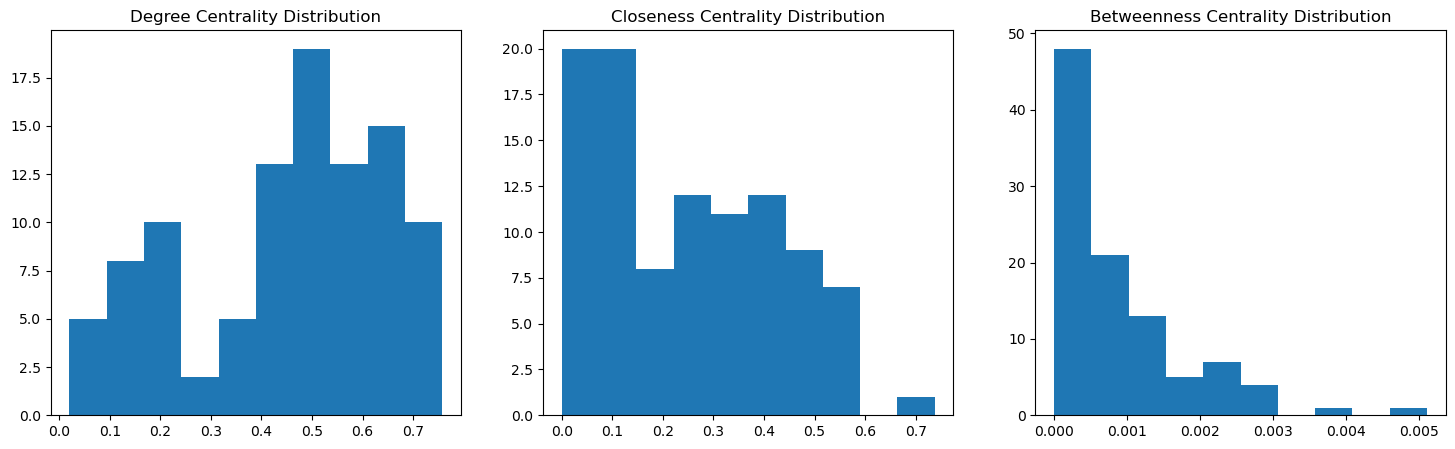

Shortest distance between top two nodes (Degree Centrality): 1
Shortest distance between top two nodes (Closeness Centrality): None
Shortest distance between top two nodes (Betweenness Centrality): None


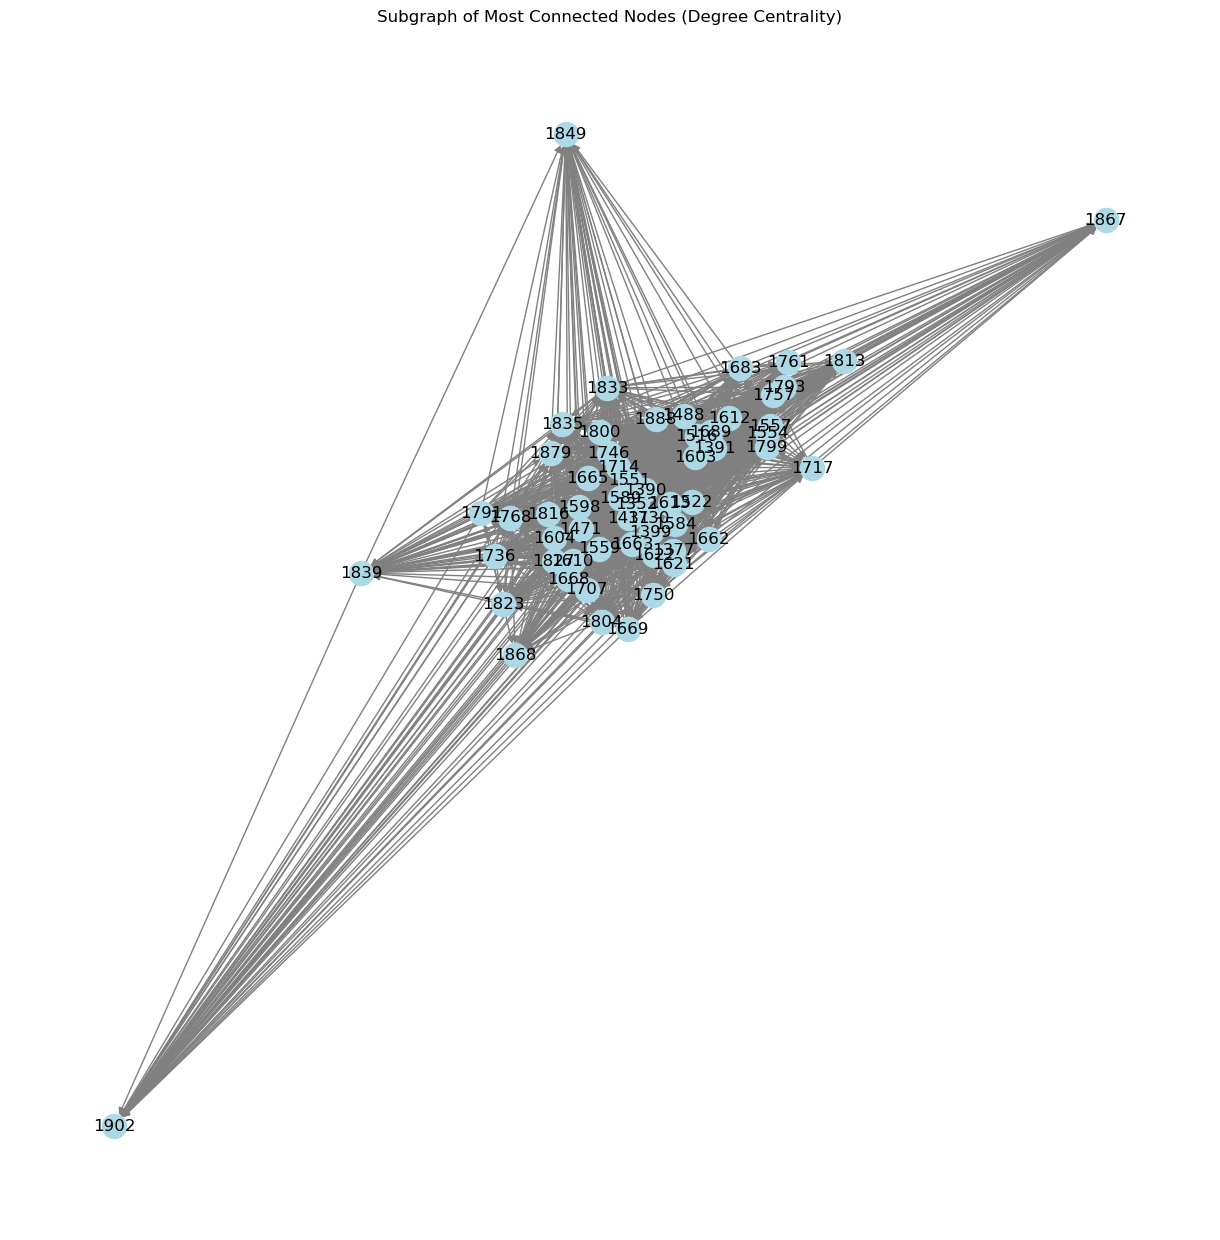

Shortest distance between top two nodes (Clustering Coefficient): 1


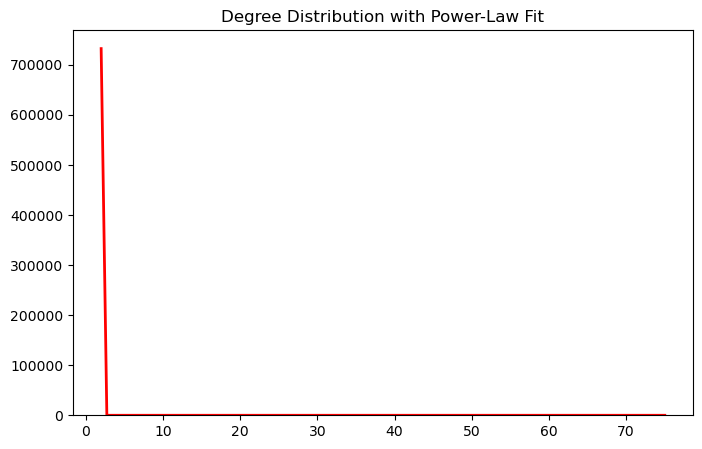

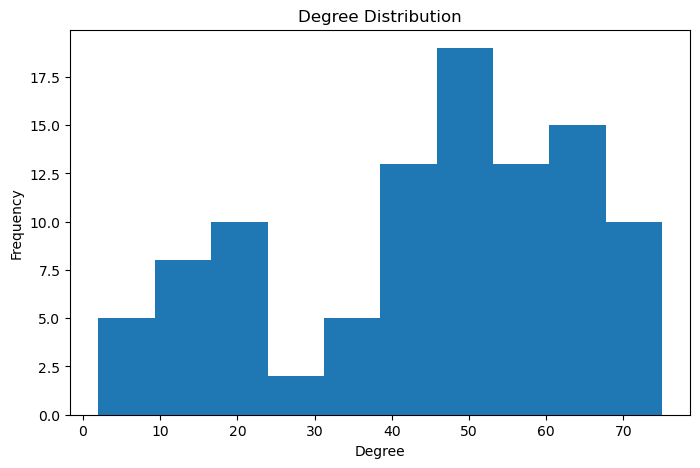

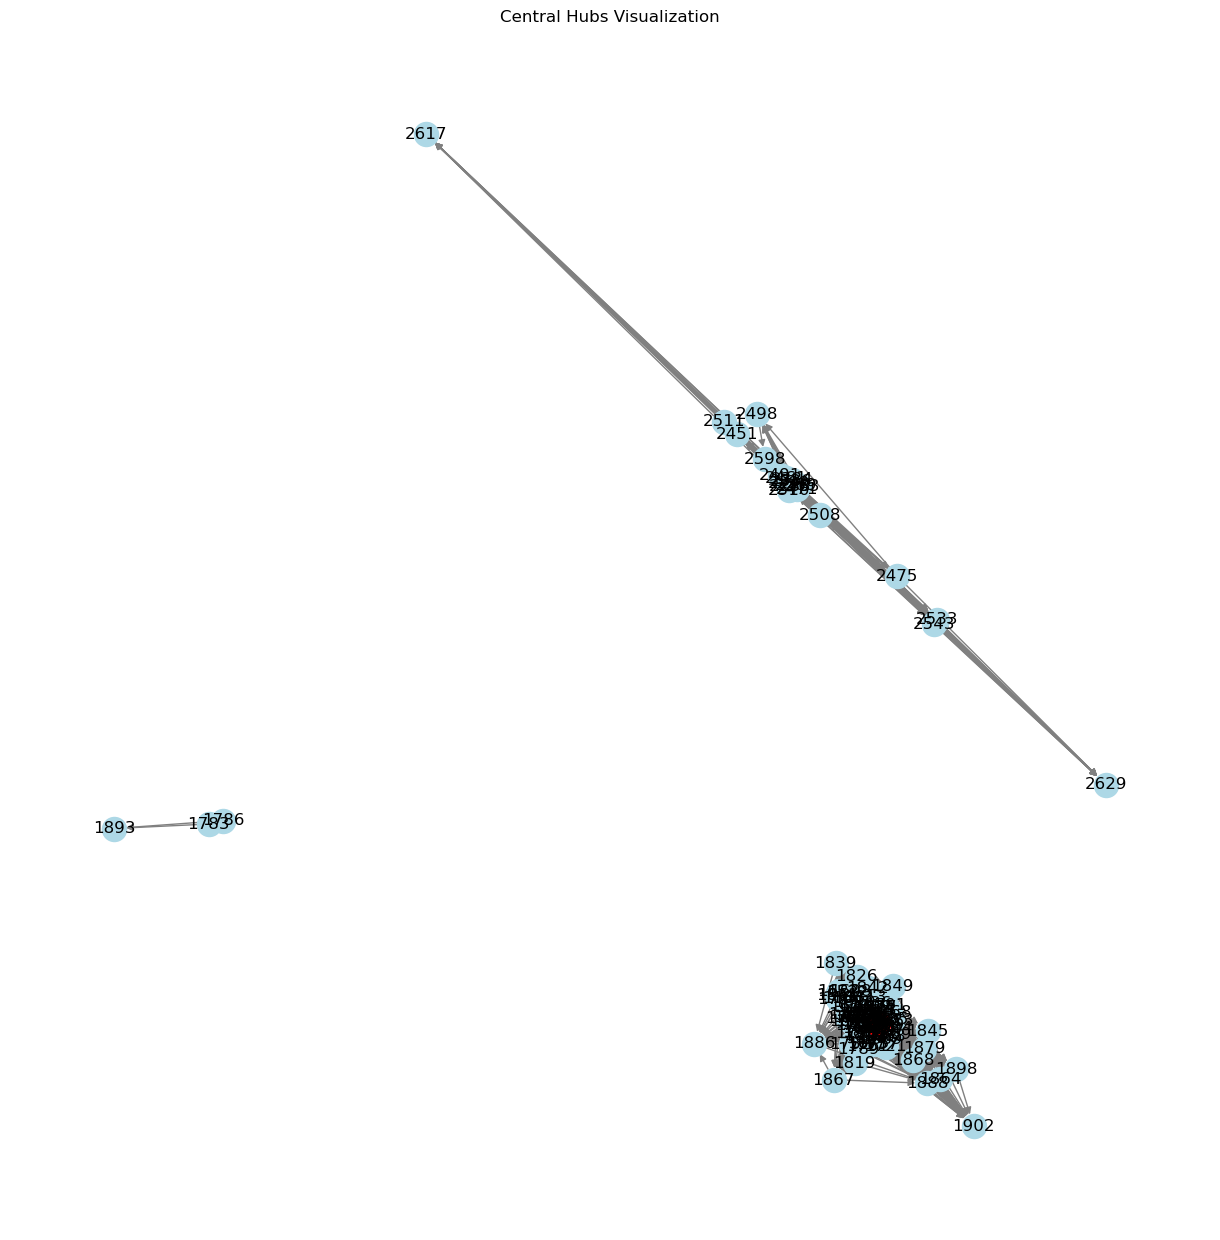

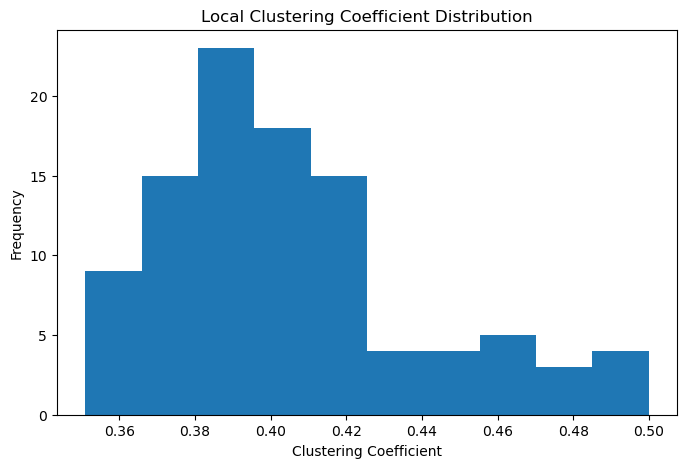

In [9]:
#B
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import powerlaw

# Load the dataset from a local file without column names
edges = pd.read_csv('facebook_combined.txt', sep=' ', header=None, names=['source', 'target'])

# Create a directed graph
G = nx.from_pandas_edgelist(edges, source='source', target='target', create_using=nx.DiGraph())

# Calculate in-degree centrality for all nodes
in_degree_centrality = nx.in_degree_centrality(G)

# Select the first 100 nodes whose in-degree centrality is between 0.02 and 0.1 (since in-degree centrality is normalized)
selected_nodes = [node for node, centrality in in_degree_centrality.items() if 0.02 <= centrality <= 0.1][:100]

# Check if selected_nodes is empty
if not selected_nodes:
    print("No nodes found with in-degree centrality between 0.02 and 0.1.")
else:
    # Create a subgraph with the selected nodes
    subgraph = G.subgraph(selected_nodes)

    # Calculate degree, closeness, and betweenness centrality for each node in the selected subset
    degree_centrality = nx.degree_centrality(subgraph)
    closeness_centrality = nx.closeness_centrality(subgraph)
    betweenness_centrality = nx.betweenness_centrality(subgraph)

    # Display the corresponding distribution (histogram)
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, 1)
    plt.hist(degree_centrality.values(), bins=10)
    plt.title("Degree Centrality Distribution")

    plt.subplot(1, 3, 2)
    plt.hist(closeness_centrality.values(), bins=10)
    plt.title("Closeness Centrality Distribution")

    plt.subplot(1, 3, 3)
    plt.hist(betweenness_centrality.values(), bins=10)
    plt.title("Betweenness Centrality Distribution")

    plt.show()

    # Calculate the shortest distance between the node(s) with the highest centrality score and the node(s) with the second-highest centrality score (for degree, closeness, and betweenness centrality measures)
    def shortest_distance_between_top_two(centrality):
        sorted_nodes = sorted(centrality, key=centrality.get, reverse=True)
        highest_node = sorted_nodes[0]
        second_highest_node = sorted_nodes[1]
        if nx.has_path(subgraph, source=highest_node, target=second_highest_node):
            return nx.shortest_path_length(subgraph, source=highest_node, target=second_highest_node)
        else:
            return None

    print("Shortest distance between top two nodes (Degree Centrality):", shortest_distance_between_top_two(degree_centrality))
    print("Shortest distance between top two nodes (Closeness Centrality):", shortest_distance_between_top_two(closeness_centrality))
    print("Shortest distance between top two nodes (Betweenness Centrality):", shortest_distance_between_top_two(betweenness_centrality))

    # Display the subgraph where the nodes are most connected in terms of degree centrality, applying reasonable criteria for node selection
    most_connected_nodes = [node for node, centrality in degree_centrality.items() if centrality > np.mean(list(degree_centrality.values()))]
    most_connected_subgraph = subgraph.subgraph(most_connected_nodes)

    pos = nx.spring_layout(most_connected_subgraph)
    plt.figure(figsize=(12, 12))
    nx.draw(most_connected_subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title("Subgraph of Most Connected Nodes (Degree Centrality)")
    plt.show()

    # Calculate the local clustering coefficients and the shortest distance among the nodes with the highest and second-highest clustering coefficient
    local_clustering_coefficients = nx.clustering(subgraph)

    sorted_clustering_nodes = sorted(local_clustering_coefficients, key=local_clustering_coefficients.get, reverse=True)
    highest_clustering_node = sorted_clustering_nodes[0]
    second_highest_clustering_node = sorted_clustering_nodes[1]

    if nx.has_path(subgraph, source=highest_clustering_node, target=second_highest_clustering_node):
        shortest_distance_clustering = nx.shortest_path_length(subgraph, source=highest_clustering_node, target=second_highest_clustering_node)
        print("Shortest distance between top two nodes (Clustering Coefficient):", shortest_distance_clustering)
    else:
        print("No path between top two nodes (Clustering Coefficient).")

    # Check whether a power-law distribution is fitted to the degree distribution of the network subset
    degree_sequence = sorted([d for n, d in subgraph.degree()], reverse=True)
    fit = powerlaw.fit(degree_sequence)

    plt.figure(figsize=(8, 5))
    plt.hist(degree_sequence, bins=10, density=True)
    xmin = min(degree_sequence)
    xmax = max(degree_sequence)
    x = np.linspace(xmin, xmax, 100)
    pdf_fitted = powerlaw.pdf(x, *fit)
    plt.plot(x, pdf_fitted, 'r-', lw=2)
    plt.title("Degree Distribution with Power-Law Fit")
    plt.show()

# Visualizations to highlight relevant aspects of the network structure

# Degree distributions
plt.figure(figsize=(8, 5))
plt.hist(degree_sequence, bins=10)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Central hubs visualization
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(12, 12))
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
nx.draw_networkx_nodes(subgraph, pos,
                       nodelist=[sorted(degree_centrality.keys(), key=lambda x: degree_centrality[x], reverse=True)[0]],
                       node_color='red')
plt.title("Central Hubs Visualization")
plt.show()

# Clustering behavior visualization
local_clustering_coefficients_values = list(local_clustering_coefficients.values())
plt.figure(figsize=(8, 5))
plt.hist(local_clustering_coefficients_values, bins=10)
plt.title("Local Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()